![image.png](attachment:image.png)

##### **Good luck with taking your exam. Keep working and make your dreams all come true. Seeing the results of all of your hard work will make this struggle worth it. We’re all thinking of you.** 
<b><font color='blue'>AI-PRO Spark Team ITI</font></b>

## Objective:
- The objective from this project is to create a <b>Logistic Regression Classifier</b> to predict the <b>Stroke Condition</b>.
- <b>Stoke</b> is a condition in which either the blood flow to the brain stops or blood flow is excessive.
- It is required to obtain <b>ROC > 0.65</b>.

### Data:
- Data is provided in csv format in a file named <b>healthcare-dataset-stroke-data.csv</b>

### Column names and data types are as follow:
- id, integer.
- gender, string.
- age, double.
- hypertension, integer.
- heart_disease, integer.
- ever_married, string.
- work_type, string.
- Residence_type, string.
- avg_glucose_level, double.
- bmi, double.
- smoking_status, string.
- stroke, integer <b>(Target Label)</b>.
If the person has stroke the stroke label value is <b>"1"</b> otherwise <b>"0"</b>.

## To perform this task follow the following guiding steps:

### Create a spark session and import the required libraries

In [ ]:
!pip install pyspark 

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName('Exam').getOrCreate()

### Create a data schema programatically

In [ ]:
from pyspark.sql.types import StructType, DoubleType, StringType,IntegerType, StructField

In [ ]:
schema = StructType([StructField("id", IntegerType(), True),
                    StructField("gender", StringType(), True),
                    StructField("age", DoubleType(), True),
                    StructField("hypertension", IntegerType(), True),
                    StructField("heart_disease", IntegerType(), True),
                    StructField("ever_married", StringType(), True),
                    StructField("work_type", StringType(), True),
                    StructField("Residence", StringType(), True),
                    StructField("avg_glucose_level", DoubleType(), True),
                    StructField("bmi", DoubleType(), True),
                    StructField("smoking_status", StringType(), True),
                    StructField("stroke", IntegerType(), True)])

### Read the data using the standard DataReader (Key,Value) pairs format
- Provide the schema and any other required options.

In [ ]:
df = spark.read.csv('/content/sample_data/healthcare-dataset-stroke-data - healthcare-dataset-stroke-data.csv', schema = schema , header = True)

In [ ]:
df.show(5)

+-----+------+----+------------+-------------+------------+-------------+---------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+---------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|    Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|    Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|    Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|    Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         Yes|Self-employed|    Rural|       

### Explore the data 
#### You have to do the following:
- Print the Schema.
- Show the first 10 rows from the data.
- Explore null values and show how many null values in each column.
- Plot a count plot for the target label and <b>notice the graph</b>.
- Perform any additional EDA you find useful.

In [ ]:
#printSchema
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [ ]:
#print first 10 rows
df.show(10)

+-----+------+----+------------+-------------+------------+-------------+---------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+---------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|    Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|    Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|    Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|    Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         Yes|Self-employed|    Rural|       

In [ ]:
df.count()

5110

In [ ]:
from pyspark.sql.functions import isnan, when, count, col

In [ ]:
#count of null in each column
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+---+------------+-------------+------------+---------+---------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+---------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|        0|                0|201|             0|     0|
+---+------+---+------------+-------------+------------+---------+---------+-----------------+---+--------------+------+



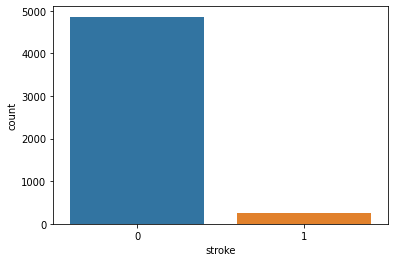

In [ ]:
#drawing the count plot
import seaborn as sns
y = df.select('stroke').toPandas()
sns.countplot(x = 'stroke' , data = y)

In [ ]:
#the data is highly imbalanced

### Get the summary statistics of the age column
- You will find the minimum age is about <b>0.08</b>.
- Remove rows for the age below <b>2 years old</b>.

In [ ]:
df.describe().select('summary','age').show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    max|              82.0|
+-------+------------------+



In [ ]:
df1 = df.filter('age >= 2')

In [ ]:
df1.describe().select('summary','age').show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              4990|
|   mean| 44.23907815631262|
| stddev|21.908077881917443|
|    min|               2.0|
|    max|              82.0|
+-------+------------------+



### Working with gender & smoking_status columns:
- Select and show the gender & smoking_status columns
- Get the distinct values for each column.

In [ ]:
df1.show(2)

+-----+------+----+------------+-------------+------------+-------------+---------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+---------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|    Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|    Rural|           202.21|null|   never smoked|     1|
+-----+------+----+------------+-------------+------------+-------------+---------+-----------------+----+---------------+------+
only showing top 2 rows



In [ ]:
df1.select('gender','smoking_status').show()

+------+---------------+
|gender| smoking_status|
+------+---------------+
|  Male|formerly smoked|
|Female|   never smoked|
|  Male|   never smoked|
|Female|         smokes|
|Female|   never smoked|
|  Male|formerly smoked|
|  Male|   never smoked|
|Female|   never smoked|
|Female|        Unknown|
|Female|        Unknown|
|Female|   never smoked|
|Female|         smokes|
|Female|         smokes|
|  Male|        Unknown|
|Female|   never smoked|
|Female|   never smoked|
|  Male|         smokes|
|  Male|         smokes|
|Female|   never smoked|
|  Male|        Unknown|
+------+---------------+
only showing top 20 rows



In [ ]:
#gender
df1.select('gender').distinct().show()


+------+
|gender|
+------+
|Female|
| Other|
|  Male|
+------+



In [ ]:
#smoking status
#gender
df1.select('smoking_status').distinct().show()

+---------------+
| smoking_status|
+---------------+
|         smokes|
|        Unknown|
|   never smoked|
|formerly smoked|
+---------------+



#### Change the string values of the columns into numerical values as follow:
1. Gender column:
    * Male = 1 
    * Female = 0 
    * Other = 0 
2. Smoking Status column:
  * never smoked = 0
  * Unknown = 0.5
  * formerly smoked = 0.75
  * smokes = 1.0


In [ ]:
from pyspark.sql.functions import udf

In [ ]:
#imputing the gender
def impu_gen(x):
  if x == 'Male':
    return 1
  else:
    return 0

In [ ]:
x = udf(lambda x: impu_gen(x),IntegerType())
df1 = df1.withColumn('Gender', x('Gender'))

In [ ]:
df1.show(10)

+-----+------+----+------------+-------------+------------+-------------+---------+-----------------+----+---------------+------+
|   id|Gender| age|hypertension|heart_disease|ever_married|    work_type|Residence|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+---------+-----------------+----+---------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|    Urban|           228.69|36.6|formerly smoked|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|    Rural|           202.21|null|   never smoked|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|    Rural|           105.92|32.5|   never smoked|     1|
|60182|     0|49.0|           0|            0|         Yes|      Private|    Urban|           171.23|34.4|         smokes|     1|
| 1665|     0|79.0|           1|            0|         Yes|Self-employed|    Rural|       

In [ ]:
dic = {'never smoked' : 0.0,
'Unknown' : 0.5,
'formerly smoked' : 0.75,
'smokes' : 1.0}

In [ ]:
y = udf(lambda x: dic[x],DoubleType())
df1 = df1.withColumn('smoking_status', y('smoking_status'))

In [ ]:
df1.show(10)

+-----+------+----+------------+-------------+------------+-------------+---------+-----------------+----+--------------+------+
|   id|Gender| age|hypertension|heart_disease|ever_married|    work_type|Residence|avg_glucose_level| bmi|smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+---------+-----------------+----+--------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|    Urban|           228.69|36.6|          0.75|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|    Rural|           202.21|null|           0.0|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|    Rural|           105.92|32.5|           0.0|     1|
|60182|     0|49.0|           0|            0|         Yes|      Private|    Urban|           171.23|34.4|           1.0|     1|
| 1665|     0|79.0|           1|            0|         Yes|Self-employed|    Rural|           174

#### Show the output DataFrame
- Select and show the gender & smoking_status columns after value changing.
- Print schema for the new dataframe.

In [ ]:
df1.select('Gender','smoking_status').show()

+------+--------------+
|Gender|smoking_status|
+------+--------------+
|     1|          0.75|
|     0|           0.0|
|     1|           0.0|
|     0|           1.0|
|     0|           0.0|
|     1|          0.75|
|     1|           0.0|
|     0|           0.0|
|     0|           0.5|
|     0|           0.5|
|     0|           0.0|
|     0|           1.0|
|     0|           1.0|
|     1|           0.5|
|     0|           0.0|
|     0|           0.0|
|     1|           1.0|
|     1|           1.0|
|     0|           0.0|
|     1|           0.5|
+------+--------------+
only showing top 20 rows



### Deal with null value according to your data analysis.

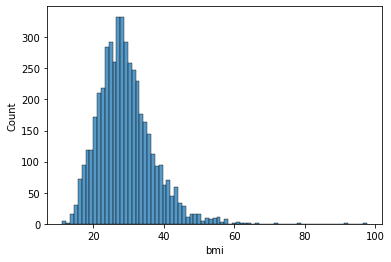

In [ ]:
yy = df1.select('bmi').toPandas()
sns.histplot(x = 'bmi',data = yy)

In [ ]:
#we are going to impute with median
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCol = 'bmi' , outputCol = 'bmi').setStrategy('median')

In [ ]:
df11 = imputer.fit(df1).transform(df1)

In [ ]:
df11.show(10)

+-----+------+----+------------+-------------+------------+-------------+---------+-----------------+----+--------------+------+
|   id|Gender| age|hypertension|heart_disease|ever_married|    work_type|Residence|avg_glucose_level| bmi|smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+---------+-----------------+----+--------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|    Urban|           228.69|36.6|          0.75|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|    Rural|           202.21|28.2|           0.0|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|    Rural|           105.92|32.5|           0.0|     1|
|60182|     0|49.0|           0|            0|         Yes|      Private|    Urban|           171.23|34.4|           1.0|     1|
| 1665|     0|79.0|           1|            0|         Yes|Self-employed|    Rural|           174

### Split the data into training and test dataframes:
- 80% training and 20% test.
- seed = 42.
- Save each dataframe as a parquet file

In [ ]:
train,test = df11.randomSplit([0.8 , 0.2], seed = 42)

### Read the saved Train and Test DataFrame:
- Use the dataframes you read in the subsequent steps.

In [ ]:
train.write.parquet("/content/sample_data/train.parquet")
test.write.parquet("/content/sample_data/test.parquet")

In [ ]:
train_r = spark.read.parquet("/content/sample_data/train.parquet")
test_r = spark.read.parquet("/content/sample_data/test.parquet")

### Create the model:
- Perform feature engineering steps.
- Create the logistic regression classifier.
- Build the pipeline model that uses all feature engineering steps and the model.
- Train the pipeline model using the trainig dataset.

In [ ]:
train_r.show(5)

+---+------+----+------------+-------------+------------+---------+---------+-----------------+----+--------------+------+
| id|Gender| age|hypertension|heart_disease|ever_married|work_type|Residence|avg_glucose_level| bmi|smoking_status|stroke|
+---+------+----+------------+-------------+------------+---------+---------+-----------------+----+--------------+------+
| 67|     0|17.0|           0|            0|          No|  Private|    Urban|            92.97|28.2|          0.75|     0|
| 77|     0|13.0|           0|            0|          No| children|    Rural|            85.81|18.6|           0.5|     0|
| 91|     0|42.0|           0|            0|          No|  Private|    Urban|            98.53|18.5|           0.0|     0|
| 99|     0|31.0|           0|            0|          No|  Private|    Urban|           108.89|52.3|           0.5|     0|
|121|     0|38.0|           0|            0|         Yes|  Private|    Urban|            91.44|28.2|           0.5|     0|
+---+------+----

In [ ]:
train_r = train_r.drop('id')
test_r = test_r.drop('id')

In [ ]:
#checking the distinct values in work_type and residence and ever_married

In [ ]:
df1.select('work_type').distinct().show()
df1.select('Residence').distinct().show()
df1.select('ever_married').distinct().show()

+-------------+
|    work_type|
+-------------+
| Never_worked|
|Self-employed|
|      Private|
|     children|
|     Govt_job|
+-------------+

+---------+
|Residence|
+---------+
|    Urban|
|    Rural|
+---------+

+------------+
|ever_married|
+------------+
|          No|
|         Yes|
+------------+



In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler,OneHotEncoder
from pyspark.ml import Pipeline

In [ ]:
cat_cols = ['work_type','Residence','ever_married']

In [ ]:
indexOutputCols = [x + "_Index" for x in cat_cols]
oheOutputCols = [x + "_OHE" for x in cat_cols]

In [ ]:
indexOutputCols

['work_type_Index', 'Residence_Index', 'ever_married_Index']

In [ ]:
oheOutputCols 

['work_type_OHE', 'Residence_OHE', 'ever_married_OHE']

In [ ]:
stringIndexer = StringIndexer(inputCols=cat_cols,
                             outputCols=indexOutputCols,
                             handleInvalid='skip')
oheEncoder = OneHotEncoder(inputCols=indexOutputCols,
                          outputCols=oheOutputCols)

In [ ]:
numericCols = [field for (field,dataType) in train_r.dtypes
              if ((dataType!='string')& (field!='stroke'))]
numericCols

['Gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [ ]:
assemblerInputs = oheOutputCols + numericCols

In [ ]:
assemblerInputs

['work_type_OHE',
 'Residence_OHE',
 'ever_married_OHE',
 'Gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [ ]:
vecAssembler = VectorAssembler(inputCols=assemblerInputs,outputCol='features')

In [ ]:
 from pyspark.ml.classification import LogisticRegression
 LR = LogisticRegression(featuresCol = 'features', labelCol = 'stroke')

In [ ]:
pipeline = Pipeline(stages=[stringIndexer,oheEncoder,vecAssembler,LR])

In [ ]:
predictions = pipeline.fit(train_r).transform(test_r)

In [ ]:
predictions.show()

+------+----+------------+-------------+------------+-------------+---------+-----------------+----+--------------+------+---------------+---------------+------------------+-------------+-------------+----------------+--------------------+--------------------+--------------------+----------+
|Gender| age|hypertension|heart_disease|ever_married|    work_type|Residence|avg_glucose_level| bmi|smoking_status|stroke|work_type_Index|Residence_Index|ever_married_Index|work_type_OHE|Residence_OHE|ever_married_OHE|            features|       rawPrediction|         probability|prediction|
+------+----+------------+-------------+------------+-------------+---------+-----------------+----+--------------+------+---------------+---------------+------------------+-------------+-------------+----------------+--------------------+--------------------+--------------------+----------+
|     1|55.0|           0|            0|         Yes|      Private|    Urban|            89.17|31.5|           0.0|     0

In [ ]:
predictions.select('prediction').distinct().show()

+----------+
|prediction|
+----------+
|       0.0|
+----------+



### Perform predictions on tests dataframe:
- Test the model using the test dataframe
- Select and show the feature column.
- Print the schema of the output dataframe.
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   

In [ ]:
predictions.select('features').show()

+--------------------+
|            features|
+--------------------+
|(13,[0,4,5,6,7,10...|
|(13,[0,4,7,10,11]...|
|(13,[0,5,7,10,11]...|
|(13,[0,5,7,10,11,...|
|(13,[0,4,5,6,7,10...|
|(13,[0,5,7,10,11]...|
|(13,[1,5,6,7,8,10...|
|(13,[1,4,5,7,10,1...|
|(13,[3,7,10,11,12...|
|(13,[0,5,6,7,10,1...|
|(13,[2,5,6,7,10,1...|
|(13,[0,7,8,9,10,1...|
|(13,[0,6,7,10,11]...|
|(13,[1,5,7,10,11,...|
|(13,[0,5,7,8,10,1...|
|(13,[2,4,5,7,10,1...|
|(13,[0,4,7,10,11]...|
|[1.0,0.0,0.0,0.0,...|
|[0.0,0.0,1.0,0.0,...|
|(13,[0,4,7,10,11]...|
+--------------------+
only showing top 20 rows



### Evaluate the model performance
- Use <b>BinaryClassificationEvaluator</b>. This will calculate the <b>ROC</b>.
- Set the parameters as follow:
    - <b>rawPredictionCol='prediction'</b> and <b>labelCol='stroke'</b>

In [134]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [135]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')

In [136]:

evaluatorROC.evaluate(predictions)

0.5

### Improve Model Performance
- You may noticed that <b>the target label is imbalanced</b>.
- LogisticRegression classifier has a special parameter <b>weightCol</b> to deal with imbalanced class.
- In order to use this parameter you must have a <b>weightCol</b> in your training dataframe.
- In order to create this column you will need to define a <b>UDF</b> and apply it to the target label column.
- Create a LogisticRegression classifier with <b>weightCol</b> parameter.
- Build and train a pipeline model with the new LogisticRegression.
- Perform the prediction on the test dataframe. 
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   
- Evaluate the model performance exactly as in the previous step.
### YOU SHOULD OBTAIN  ROC > 0.65
<BR>
<b><font color='red'>Note: feel free to deal with the imbalanced cluster with the above method or another. However, you can only use methods applied on SPARK DATAFRAME</font></b>

+------+-------------------+
|stroke|          weightCol|
+------+-------------------+
|     0|0.04486176317162238|
|     0|0.04486176317162238|
|     0|0.04486176317162238|
|     0|0.04486176317162238|
|     0|0.04486176317162238|
|     0|0.04486176317162238|
|     1| 0.9551382368283776|
|     0|0.04486176317162238|
|     0|0.04486176317162238|
|     0|0.04486176317162238|
|     0|0.04486176317162238|
|     0|0.04486176317162238|
|     0|0.04486176317162238|
|     0|0.04486176317162238|
|     0|0.04486176317162238|
|     0|0.04486176317162238|
|     0|0.04486176317162238|
|     0|0.04486176317162238|
|     0|0.04486176317162238|
|     0|0.04486176317162238|
+------+-------------------+
only showing top 20 rows



In [ ]:
#we are going to use the weight col

In [139]:
train_r.groupBy('stroke').count().show()

+------+-----+
|stroke|count|
+------+-----+
|     1|  202|
|     0| 3835|
+------+-----+



In [140]:
202/(202+3835)

0.05003715630418628

In [141]:
dic3 = {0 : 0.05, 1 : 0.95}

In [142]:
weight = udf(lambda x : dic3[x], DoubleType())
train_r = train_r.withColumn('weights',weight('stroke'))

In [143]:
train_r.show(5)

+------+----+------------+-------------+------------+---------+---------+-----------------+----+--------------+------+-------+
|Gender| age|hypertension|heart_disease|ever_married|work_type|Residence|avg_glucose_level| bmi|smoking_status|stroke|weights|
+------+----+------------+-------------+------------+---------+---------+-----------------+----+--------------+------+-------+
|     0|17.0|           0|            0|          No|  Private|    Urban|            92.97|28.2|          0.75|     0|   0.05|
|     0|13.0|           0|            0|          No| children|    Rural|            85.81|18.6|           0.5|     0|   0.05|
|     0|42.0|           0|            0|          No|  Private|    Urban|            98.53|18.5|           0.0|     0|   0.05|
|     0|31.0|           0|            0|          No|  Private|    Urban|           108.89|52.3|           0.5|     0|   0.05|
|     0|38.0|           0|            0|         Yes|  Private|    Urban|            91.44|28.2|           0.5|

In [149]:
 LR = LogisticRegression(featuresCol = 'features', labelCol = 'stroke', weightCol = 'weights')

In [150]:
pipeline2 = Pipeline(stages=[stringIndexer,oheEncoder,vecAssembler,LR])

In [151]:
predictions2 = pipeline2.fit(train_r).transform(test_r)

In [152]:
predictions2.select('prediction').distinct().show()

+----------+
|prediction|
+----------+
|       0.0|
|       1.0|
+----------+



In [153]:
evaluatorROC.evaluate(predictions2)
#higher than the needed 0.65

0.7757777671252577

# GOOD LUCK
<b><font color='GREEN'>AI-PRO Spark Team ITI</font></b>

![image-3.png](attachment:image-3.png)